# Prediction of Car Accidents Severity 
### Capstone Project
*By Nikita Kohli*

In [1]:
#import numpy as np 
#import pandas as pd 

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))


### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [3]:
state_lst=['PA']
state_lst_full=['Pennsylvania']

# We will focus on accident severities 2, 3 & 4
severity_lst=[2,3,4]

# Set a list of colors, markers and linestyles for plotting
color_lst=['b']
marker_lst=['o']
linestyle_lst=['dashdot']

# Set a list of month, weekday, hour for reindex purpose and time_duraction to clear the accident
month_lst = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']
weekday_lst = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_lst_full = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_lst= np.arange(24)
td='Time_Duration(min)'

### Import the dataset

In [4]:
# Import the data
df = pd.read_csv('US_Accidents_June20.csv')
df = df[df.State.isin(state_lst)]
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
197865,A-197867,MapQuest,201.0,3,2016-12-26 14:00:12,2016-12-26 14:45:00,41.338398,-74.837120,NaN,NaN,0.01,Accident on I-84 Eastbound at Exit 46 US-6 Gra...,NaN,I-84 E,R,Milford,Pike,PA,18337,US,US/Eastern,KFWN,2016-12-26 13:53:00,28.9,25.2,85.0,30.54,3.0,East,3.5,0.01,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
208994,A-208996,MapQuest,201.0,2,2016-09-21 09:56:46,2016-09-21 10:41:24,41.408066,-74.914040,NaN,NaN,0.00,Accident on Twin Lakes Rd near Don Dr.,655.0,Twin Lakes Rd,L,Shohola,Pike,PA,18458-4247,US,US/Eastern,KMSV,2016-09-21 09:55:00,66.2,NaN,60.0,30.27,10.0,North,6.9,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
214862,A-214864,MapQuest,201.0,2,2016-08-24 11:03:17,2016-08-24 11:48:17,41.324230,-74.806488,NaN,NaN,0.00,Accident on US-6 Harford St both ways at 6th St.,265.0,W Harford St,R,Milford,Pike,PA,18337-1104,US,US/Eastern,KFWN,2016-08-24 10:53:00,75.9,NaN,69.0,30.28,10.0,SSE,4.6,NaN,Clear,False,False,True,False,False,False,False,False,False,True,False,False,False,Day,Day,Day,Day
228550,A-228552,MapQuest,201.0,2,2016-11-30 16:15:17,2016-11-30 17:00:18,40.057697,-76.765587,NaN,NaN,0.01,Accident on Hunter Creek Dr at PA-295 Susqueha...,4468.0,N Susquehanna Trl,R,York,York,PA,17406-8494,US,US/Eastern,KMDT,2016-11-30 15:56:00,54.0,NaN,100.0,29.70,10.0,ESE,5.8,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
228553,A-228555,MapQuest,201.0,2,2016-11-30 14:59:39,2016-11-30 17:09:55,40.301609,-75.647789,NaN,NaN,0.01,Accident on Farmington Ave at Gross Rd.,2000.0,Farmington Ave,L,Pottstown,Montgomery,PA,19464-9009,US,US/Eastern,KPTW,2016-11-30 14:54:00,57.0,NaN,100.0,29.74,8.0,Variable,3.5,0.02,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106787 entries, 197865 to 3513219
Data columns (total 49 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     106787 non-null  object 
 1   Source                 106787 non-null  object 
 2   TMC                    86366 non-null   float64
 3   Severity               106787 non-null  int64  
 4   Start_Time             106787 non-null  object 
 5   End_Time               106787 non-null  object 
 6   Start_Lat              106787 non-null  float64
 7   Start_Lng              106787 non-null  float64
 8   End_Lat                20421 non-null   float64
 9   End_Lng                20421 non-null   float64
 10  Distance(mi)           106787 non-null  float64
 11  Description            106787 non-null  object 
 12  Number                 59887 non-null   float64
 13  Street                 106787 non-null  object 
 14  Side                   106787 

### Extract year, month, day, hour, weekday, and time to clear accidents

In [6]:
# Convert Start_Time and End_Time to datetypes
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Extract year, month, day, hour and weekday
df['Year']=df['Start_Time'].dt.year
df['Month']=df['Start_Time'].dt.strftime('%b')
df['Day']=df['Start_Time'].dt.day
df['Hour']=df['Start_Time'].dt.hour
df['Weekday']=df['Start_Time'].dt.strftime('%a')

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
td='Time_Duration(min)'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Day,Hour,Weekday,Time_Duration(min)
197865,A-197867,MapQuest,201.0,3,2016-12-26 14:00:12,2016-12-26 14:45:00,41.338398,-74.837120,NaN,NaN,0.01,Accident on I-84 Eastbound at Exit 46 US-6 Gra...,NaN,I-84 E,R,Milford,Pike,PA,18337,US,US/Eastern,KFWN,2016-12-26 13:53:00,28.9,25.2,85.0,30.54,3.0,East,3.5,0.01,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,Dec,26,14,Mon,45.0
208994,A-208996,MapQuest,201.0,2,2016-09-21 09:56:46,2016-09-21 10:41:24,41.408066,-74.914040,NaN,NaN,0.00,Accident on Twin Lakes Rd near Don Dr.,655.0,Twin Lakes Rd,L,Shohola,Pike,PA,18458-4247,US,US/Eastern,KMSV,2016-09-21 09:55:00,66.2,NaN,60.0,30.27,10.0,North,6.9,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,Sep,21,9,Wed,45.0
214862,A-214864,MapQuest,201.0,2,2016-08-24 11:03:17,2016-08-24 11:48:17,41.324230,-74.806488,NaN,NaN,0.00,Accident on US-6 Harford St both ways at 6th St.,265.0,W Harford St,R,Milford,Pike,PA,18337-1104,US,US/Eastern,KFWN,2016-08-24 10:53:00,75.9,NaN,69.0,30.28,10.0,SSE,4.6,NaN,Clear,False,False,True,False,False,False,False,False,False,True,False,False,False,Day,Day,Day,Day,2016,Aug,24,11,Wed,45.0
228550,A-228552,MapQuest,201.0,2,2016-11-30 16:15:17,2016-11-30 17:00:18,40.057697,-76.765587,NaN,NaN,0.01,Accident on Hunter Creek Dr at PA-295 Susqueha...,4468.0,N Susquehanna Trl,R,York,York,PA,17406-8494,US,US/Eastern,KMDT,2016-11-30 15:56:00,54.0,NaN,100.0,29.70,10.0,ESE,5.8,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,Nov,30,16,Wed,45.0
228553,A-228555,MapQuest,201.0,2,2016-11-30 14:59:39,2016-11-30 17:09:55,40.301609,-75.647789,NaN,NaN,0.01,Accident on Farmington Ave at Gross Rd.,2000.0,Farmington Ave,L,Pottstown,Montgomery,PA,19464-9009,US,US/Eastern,KPTW,2016-11-30 14:54:00,57.0,NaN,100.0,29.74,8.0,Variable,3.5,0.02,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,Nov,30,14,Wed,130.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106787 entries, 197865 to 3513219
Data columns (total 55 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     106787 non-null  object        
 1   Source                 106787 non-null  object        
 2   TMC                    86366 non-null   float64       
 3   Severity               106787 non-null  int64         
 4   Start_Time             106787 non-null  datetime64[ns]
 5   End_Time               106787 non-null  datetime64[ns]
 6   Start_Lat              106787 non-null  float64       
 7   Start_Lng              106787 non-null  float64       
 8   End_Lat                20421 non-null   float64       
 9   End_Lng                20421 non-null   float64       
 10  Distance(mi)           106787 non-null  float64       
 11  Description            106787 non-null  object        
 12  Number                 59887 non-null 

#### Severity Level

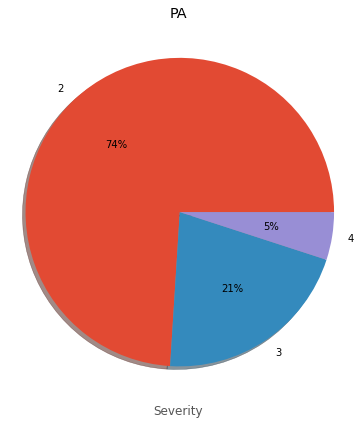

In [8]:
# The severity of accidents for each state
feature='Severity'

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=0

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(2)

    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.tight_layout()
plt.show()

### Exploratory Data Analysis 

#### WHEN
##### Daytime versus night time

In [9]:
df.Severity.value_counts().sort_values(ascending=False)

2    78724
3    22124
4     5720
1      219
Name: Severity, dtype: int64

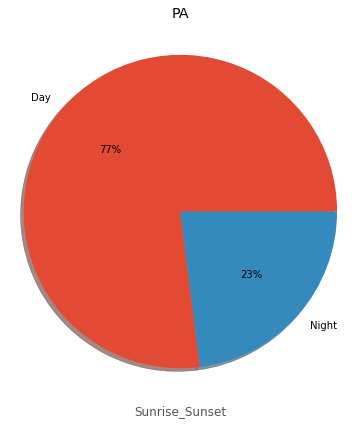

In [10]:
# The day or night when accidents occurred for PA
feature='Sunrise_Sunset'

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=2

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(2)

    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)
    
plt.tight_layout()
plt.show()

##### Weekday versus weekend

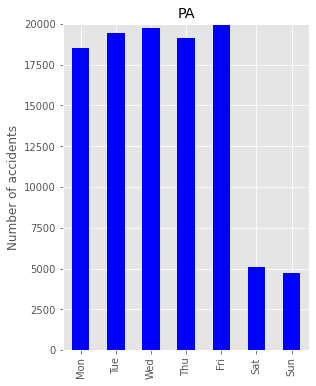

In [11]:
# Hourly distribution of accidents on weekdays in PA (for the whole dataset)
# Set the size of the figure
fig= plt.figure(figsize=(15,6))

for i,state in enumerate(state_lst):
    plt.subplot(1, 3, 1+i)
    df[df['State']==state].groupby('Weekday').count()['ID'].reindex(weekday_lst).plot(kind='bar',color=color_lst[i]).set_title(state)
    plt.xlabel('')
    plt.ylim(0, 20000)
    
    # Only diplay ylabel on the leftmost plot
    if i==0:
        plt.ylabel('Number of accidents')

##### Rush Hour

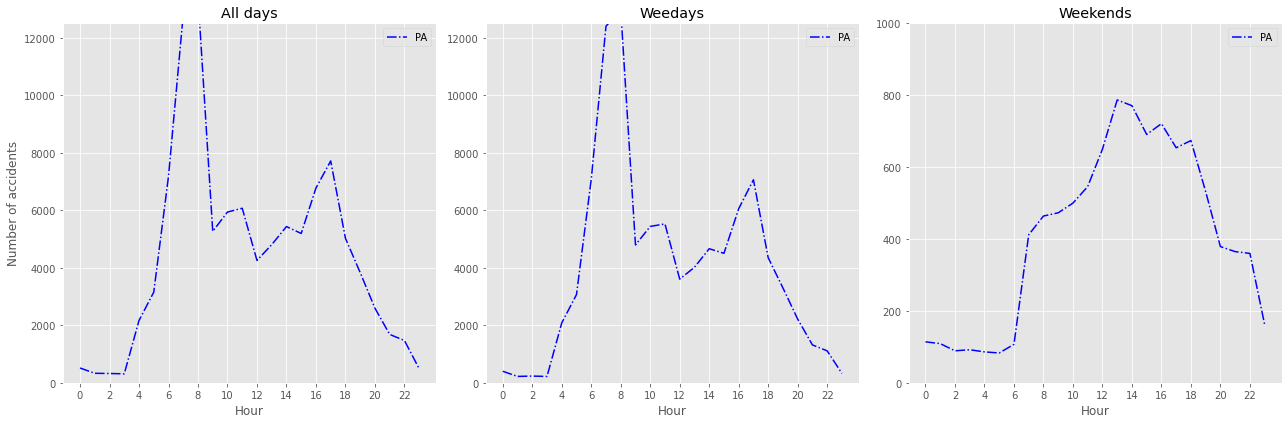

In [12]:
# Hourly distribution of accidents on all days, weekdays, & weekends in PA 
# Set the size of the figure

fig= plt.figure(figsize=(18,6))

# Plot all data together

plt.subplot(1, 3, 1)

# Plot the states of Pennsylvania on all days, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
df[df['State']=='PA'].groupby('Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashdot',color='b')

# Set labels, limit, legend, title and xticks
plt.ylabel('Number of accidents')
plt.xlabel('Hour')
plt.ylim(0, 12500)
plt.legend(['PA'])
plt.title('All days')
plt.xticks(np.arange(0, 24, step=2))

# Weekdays
plt.subplot(1, 3, 2)

# Plot the states of Pennsylvania on weekdays, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color

df[(df['State']=='PA') & (df['Weekday'].isin(weekday_lst[:5]))].groupby('Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashdot',color='b')

# Set labels, limit, legend, title and xticks
plt.xlabel('Hour')
plt.ylim(0, 12500)
plt.legend(['PA'])
plt.title('Weedays')
plt.xticks(np.arange(0, 24, step=2))

# Weekends
plt.subplot(1, 3, 3)

# Plot the state of Pennsylvania on weekends, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
df[(df['State']=='PA') & (df['Weekday'].isin(weekday_lst[5:]))].groupby('Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashdot',color='b')

# Set labels, limit, legend, title and xticks
plt.xlabel('Hour')
plt.ylim(0, 1000)
plt.legend(['PA'])
plt.title('Weekends')
plt.xticks(np.arange(0, 24, step=2))

plt.tight_layout()
plt.show()


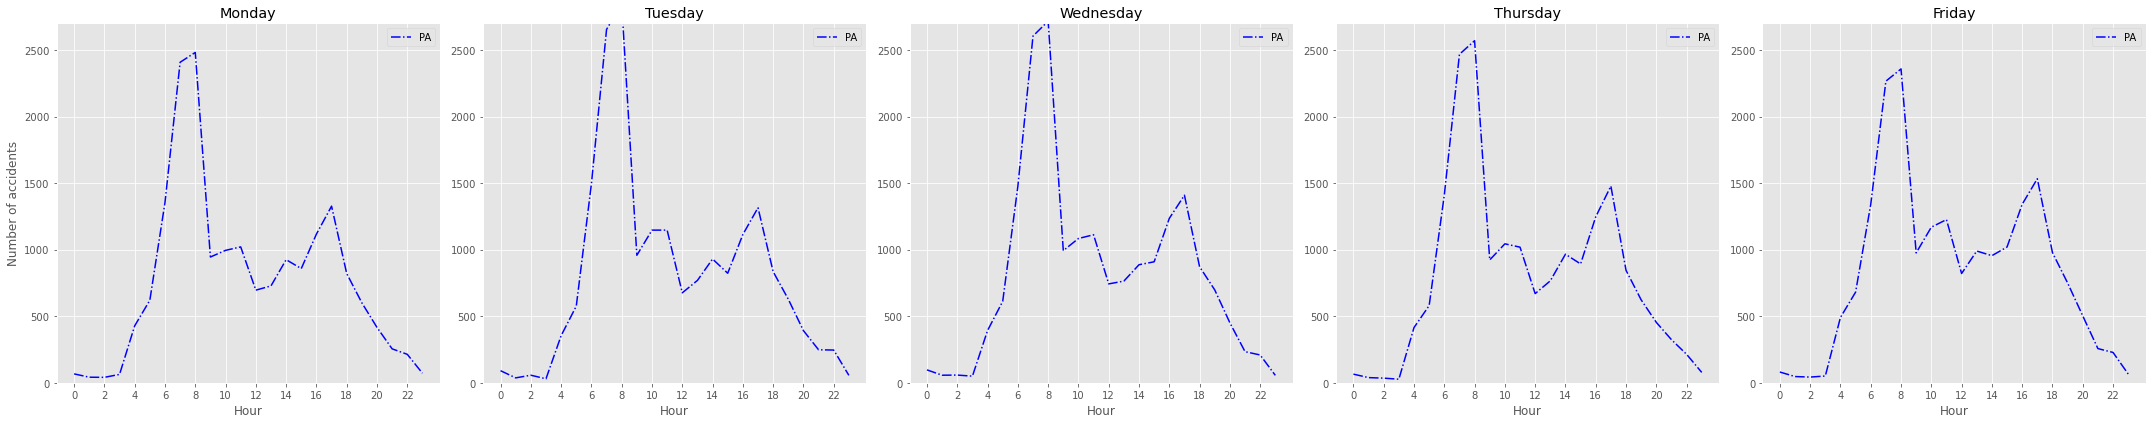

In [13]:
# Hourly distribution of accidents on weekdays in PA 
# Set the size of the figure
fig= plt.figure(figsize=(30,6))
n=5

# Make subplots on each weekday with a for loop
for i in range(n):
    plt.subplot(1, 5, i+1)
    # Plot the state of Pennsylvania on weekdays, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
    df[(df['State']=='PA') & (df['Weekday']==weekday_lst[i])].groupby('Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashdot',color='b')
    
    # Set labels, limit, legend, title and xticks
    plt.xlabel('Hour')
    plt.ylim(0, 2700)
    plt.legend(['PA'])
    plt.title(weekday_lst_full[i])
    plt.xticks(np.arange(0, 24, step=2))
    
    # Only diplay ylabel on the leftmost plot
    if i==0:
        plt.ylabel('Number of accidents')

plt.tight_layout()
plt.show()

#### WHERE
##### Street side

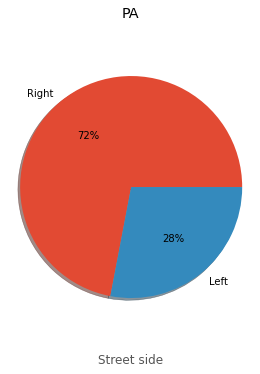

In [14]:

# The relative side of the street (Right/Left) in address field for each state.
# Set the size of the figure
fig= plt.figure(figsize=(15,6))
labels=['Right','Left']

# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
     # Slice the dataframe for the specific state and weekday
    df_side=df[df['State']==state]['Side'].value_counts(normalize=True).round(2)

    plt.pie(df_side, labels=labels, autopct='%1.0f%%', shadow=True)

    plt.axis('equal')
    plt.xlabel('Street side')
    plt.title('{}'.format(state))

plt.show()

##### County

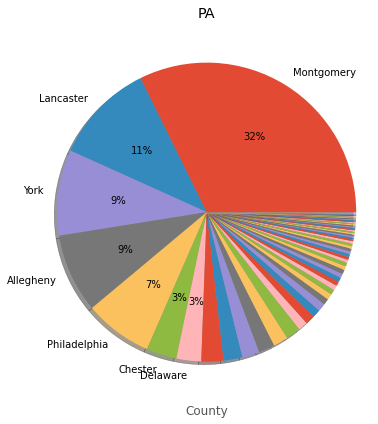

In [15]:
# The county distribution of accidents for PA
feature='County'

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=2.5

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(8)

    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.tight_layout()
plt.show()

##### City

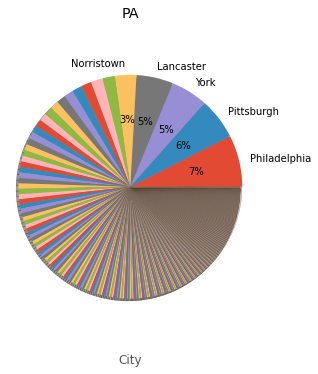

In [16]:

# The city distribution of accidents for each state
feature='City'

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=2.5

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(8)

    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.xlabel(feature)
plt.show()

##### Location

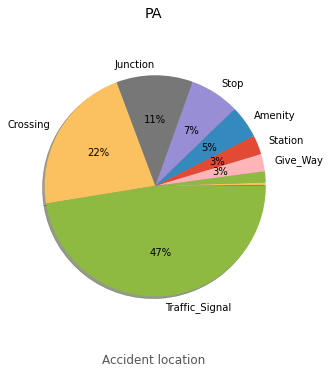

In [17]:
# The location of accidents for each state
# Where are the accidents?
feature='Accident location'

# Set the state as the index
df.set_index('State',drop=True,inplace=True)

# State is the index when selecting bool type data as df_bool
df_bool=df.select_dtypes(include=['bool'])

# Reset the index of the original data for other calculations
df.reset_index(inplace=True)

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=2.5

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df_bool[df_bool.index==state]
    df_temp=(df_temp.sum(axis=0)/df_temp.sum(axis=0).sum()).sort_values()

    
    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.xlabel(feature)
plt.show()

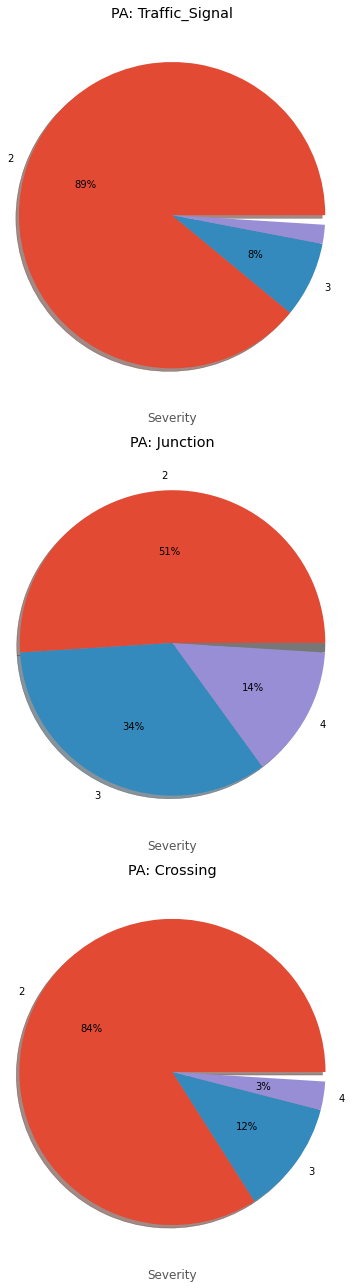

In [18]:

# Select the data with a list of columns as State, Severity and the location list
# List the locations with data types as boolean
col_sel=list(df.dtypes[df.dtypes=='bool'].index)

# Append stat and severity to the list
col_sel.append('State')
col_sel.append('Severity')

# Slice the dataframe with the list above
df_sel=df[col_sel]

# The severity for each location for each state; for each of the following locations, what's the severity of the accident?
feature='Severity'
loc_lst=['Traffic_Signal','Junction', 'Crossing']
fig_x=len(state_lst)
fig_y=len(loc_lst)

# Set the size of the figure
fig= plt.figure(figsize=(5*fig_x,6*fig_y))

# Cutoff percentage for display
pct_cutoff=2

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each location
for i,loc in enumerate(loc_lst):
    # Run a for loop for each state
    for j,state in enumerate(state_lst):
    
        # Set a sub plot
        plt.subplot(fig_y, fig_x, i*fig_x+j+1)
        # Slice the dataframe for the specific state, weather condition and feature
        
        df_temp=df_sel
                   
        df_temp=df_temp[(df_temp['State']==state) & (df_temp[loc]==True)]
        
        df_temp=df_temp[feature].value_counts(normalize=True).round(2)

        # Define lables to go with the pie plot
        labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
        # Generate the pie plot
        plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
        # Set axis,label and title
        plt.axis('equal')
        plt.xlabel(feature)
        plt.title(state+': '+loc)

plt.tight_layout()
plt.show()

#### WEATHER

In [19]:
df[df['State']==state]['Weather_Condition'].value_counts(normalize=True).round(5)

Clear                           0.27229
Overcast                        0.17263
Fair                            0.12067
Mostly Cloudy                   0.10828
Cloudy                          0.06789
Light Rain                      0.05986
Partly Cloudy                   0.05898
Scattered Clouds                0.05865
Light Snow                      0.02199
Rain                            0.01275
Fog                             0.01265
Haze                            0.00756
Heavy Rain                      0.00456
Snow                            0.00273
Light Drizzle                   0.00261
Light Freezing Rain             0.00168
Cloudy / Windy                  0.00164
Fair / Windy                    0.00152
Mostly Cloudy / Windy           0.00113
Heavy Snow                      0.00097
T-Storm                         0.00077
Partly Cloudy / Windy           0.00070
Wintry Mix                      0.00065
Mist                            0.00065
Light Rain / Windy              0.00063


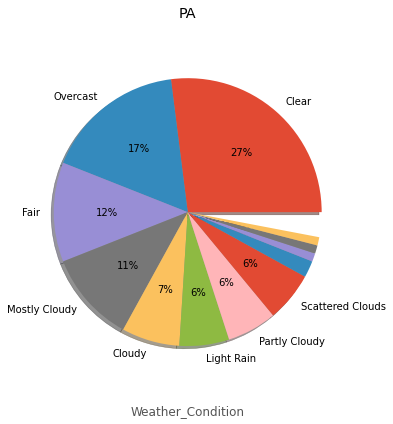

In [20]:
# The weather condition for each state
feature='Weather_Condition'

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=2

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(2)

    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.tight_layout()
plt.show()

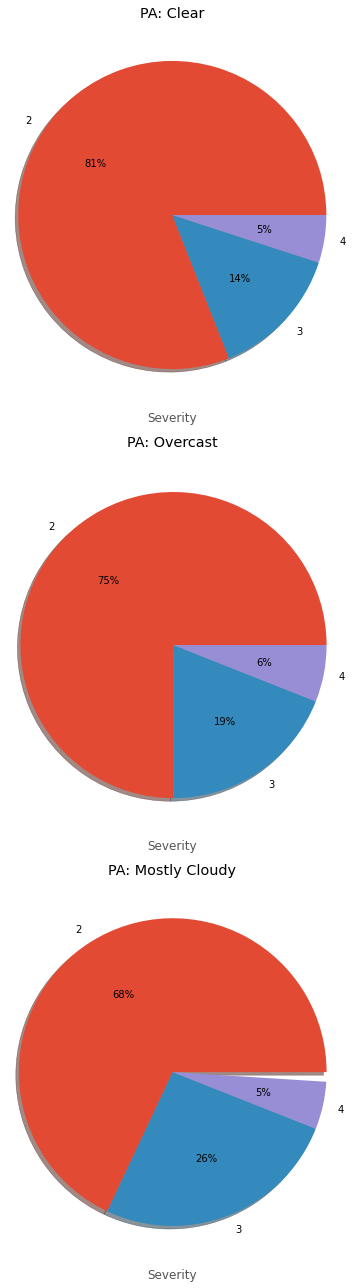

In [21]:
# The weather condition for each state; for each of the following weather conditions (Clear, Overcast and Mostly Cloudy), what's the severity?
feature='Severity'
weather_lst=['Clear','Overcast','Mostly Cloudy']
fig_x=len(state_lst)
fig_y=len(weather_lst)

# Set the size of the figure
fig= plt.figure(figsize=(5*fig_x,6*fig_y))

# Cutoff percentage for display
pct_cutoff=2

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each weather condition
for i,weather in enumerate(weather_lst):
    # Run a for loop for each state
    for j,state in enumerate(state_lst):
    
        # Set a sub plot
        plt.subplot(fig_y, fig_x, i*fig_x+j+1)
        # Slice the dataframe for the specific state, weather condition and feature
        df_temp=df[(df['State']==state) & (df['Weather_Condition']==weather)][feature].value_counts(normalize=True).round(2)

        # Define lables to go with the pie plot
        labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
        # Generate the pie plot
        plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
        # Set axis,label and title
        plt.axis('equal')
        plt.xlabel(feature)
        plt.title(state+': '+weather)

plt.tight_layout()
plt.show()

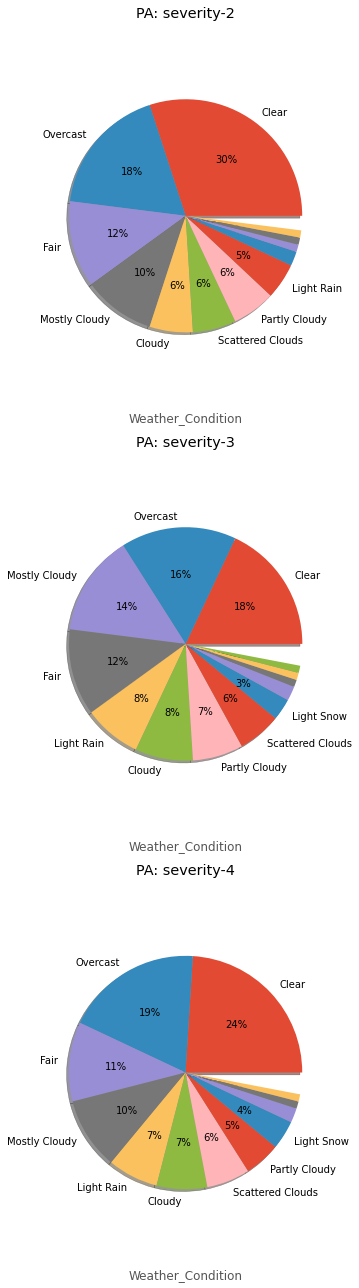

In [22]:
# The weather condition for each state; for each of the following Severity (2,3,4), what's the weather conditions?
feature='Weather_Condition'
severity_lst=[2,3,4]
fig_x=len(state_lst)
fig_y=len(severity_lst)

# Set the size of the figure
fig= plt.figure(figsize=(5*fig_x,6*fig_y))

# Cutoff percentage for display
pct_cutoff=2

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each weather condition
for i,severity in enumerate(severity_lst):
    # Run a for loop for each state
    for j,state in enumerate(state_lst):
    
        # Set a sub plot
        plt.subplot(fig_y, fig_x, i*fig_x+j+1)
        # Slice the dataframe for the specific state, weather condition and feature
        df_temp=df[(df['State']==state) & (df['Severity']==severity)][feature].value_counts(normalize=True).round(2)

        # Define lables to go with the pie plot
        labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
        # Generate the pie plot
        plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
        # Set axis,label and title
        plt.axis('equal')
        plt.xlabel(feature)
        plt.title(state+': severity-'+str(severity))

plt.tight_layout()
plt.show()

### Data Preprocessing

#### Deal with outliers

##### A. Drop rows with negative time_duration

In [23]:
# Check if there is any negative time_duration values
df[td][df[td]<=0]

Series([], Name: Time_Duration(min), dtype: float64)

In [24]:
# Drop the rows with td<0

neg_outliers=df[td]<=0

# Set outliers to NAN
df[neg_outliers] = np.nan

# Drop rows with negative td
df.dropna(subset=[td],axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106787 entries, 0 to 106786
Data columns (total 55 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   State                  106787 non-null  object        
 1   ID                     106787 non-null  object        
 2   Source                 106787 non-null  object        
 3   TMC                    86366 non-null   float64       
 4   Severity               106787 non-null  float64       
 5   Start_Time             106787 non-null  datetime64[ns]
 6   End_Time               106787 non-null  datetime64[ns]
 7   Start_Lat              106787 non-null  float64       
 8   Start_Lng              106787 non-null  float64       
 9   End_Lat                20421 non-null   float64       
 10  End_Lng                20421 non-null   float64       
 11  Distance(mi)           106787 non-null  float64       
 12  Description            106787 non-null  obje

In [25]:
# Double check to make sure no more negative td
df[td][df[td]<=0]

Series([], Name: Time_Duration(min), dtype: float64)

##### B. Fill outliers with median values

In [26]:
# Remove outliers for Time_Duration(min): n * standard_deviation (n=3), backfill with median

n=3

median = df[td].median()
std = df[td].std()
outliers = (df[td] - median).abs() > std*n

# Set outliers to NAN
df[outliers] = np.nan

# Fill NAN with median
df[td].fillna(median, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106787 entries, 0 to 106786
Data columns (total 55 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   State                  106766 non-null  object        
 1   ID                     106766 non-null  object        
 2   Source                 106766 non-null  object        
 3   TMC                    86366 non-null   float64       
 4   Severity               106766 non-null  float64       
 5   Start_Time             106766 non-null  datetime64[ns]
 6   End_Time               106766 non-null  datetime64[ns]
 7   Start_Lat              106766 non-null  float64       
 8   Start_Lng              106766 non-null  float64       
 9   End_Lat                20400 non-null   float64       
 10  End_Lng                20400 non-null   float64       
 11  Distance(mi)           106766 non-null  float64       
 12  Description            106766 non-null  obje

In [27]:
# Print time_duration information
print('Max time to clear an accident: {} minutes or {} hours or {} days; Min to clear an accident td: {} minutes.'.format(df[td].max(),round(df[td].max()/60), round(df[td].max()/60/24), df[td].min()))

Max time to clear an accident: 22286.0 minutes or 371.0 hours or 15.0 days; Min to clear an accident td: 10.0 minutes.


In [28]:
# Export the data
# df.to_csv('./US_Accidents_May19_clean.csv',index=False)

#### Step 5. Select a list of features for machine learning algorithms

 Only select relavant columns without overwhelming the computer

In [29]:
# Set the list of features to include in Machine Learning
feature_lst=['Source','TMC','Severity','Start_Lng','Start_Lat','Distance(mi)','Side','City','County','State','Timezone','Temperature(F)','Humidity(%)','Pressure(in)', 'Visibility(mi)', 'Wind_Direction','Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset','Hour','Weekday', 'Time_Duration(min)']

In [30]:
# Select the dataset to include only the selected features
df_sel=df[feature_lst].copy()
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106787 entries, 0 to 106786
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Source              106766 non-null  object 
 1   TMC                 86366 non-null   float64
 2   Severity            106766 non-null  float64
 3   Start_Lng           106766 non-null  float64
 4   Start_Lat           106766 non-null  float64
 5   Distance(mi)        106766 non-null  float64
 6   Side                106766 non-null  object 
 7   City                106766 non-null  object 
 8   County              106766 non-null  object 
 9   State               106766 non-null  object 
 10  Timezone            106766 non-null  object 
 11  Temperature(F)      105434 non-null  float64
 12  Humidity(%)         105259 non-null  float64
 13  Pressure(in)        105804 non-null  float64
 14  Visibility(mi)      105218 non-null  float64
 15  Wind_Direction      105616 non-nul

In [31]:
# Export the data with selected features
# df_sel.to_csv('./US_Accidents_May19_clean_sel.csv',index=False)

#### Step 6. Drop rows with missing values

In [32]:
# Check missing values
df_sel.isnull().mean()

Source                0.000197
TMC                   0.191231
Severity              0.000197
Start_Lng             0.000197
Start_Lat             0.000197
Distance(mi)          0.000197
Side                  0.000197
City                  0.000197
County                0.000197
State                 0.000197
Timezone              0.000197
Temperature(F)        0.012670
Humidity(%)           0.014309
Pressure(in)          0.009205
Visibility(mi)        0.014693
Wind_Direction        0.010966
Weather_Condition     0.013569
Amenity               0.000197
Bump                  0.000197
Crossing              0.000197
Give_Way              0.000197
Junction              0.000197
No_Exit               0.000197
Railway               0.000197
Roundabout            0.000197
Station               0.000197
Stop                  0.000197
Traffic_Calming       0.000197
Traffic_Signal        0.000197
Turning_Loop          0.000197
Sunrise_Sunset        0.000197
Hour                  0.000197
Weekday 

In [33]:
df_sel.dropna(subset=df_sel.columns[df_sel.isnull().mean()!=0], how='any', axis=0, inplace=True)
df_sel.shape

(84378, 34)

In [34]:
# Export the data with selected features
# df_sel.to_csv('./US_Accidents_May19_clean_sel_dropna.csv',index=False)

#### Select the state of interest: PA; and County of interest: Montgomery
   

Due to the limitation of personal laptop, the whole US dataset is too big to handle

In [35]:
# Import data if it was already exported based on previous work
# df_sel=pd.read_csv('./US_Accidents_May19_clean_sel_dropna.csv')

In [36]:
# Set state
state='PA'

# Select the state of Pennsylvania
df_state=df_sel.loc[df_sel.State==state].copy()
df_state.drop('State',axis=1, inplace=True)
df_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84378 entries, 0 to 86365
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Source              84378 non-null  object 
 1   TMC                 84378 non-null  float64
 2   Severity            84378 non-null  float64
 3   Start_Lng           84378 non-null  float64
 4   Start_Lat           84378 non-null  float64
 5   Distance(mi)        84378 non-null  float64
 6   Side                84378 non-null  object 
 7   City                84378 non-null  object 
 8   County              84378 non-null  object 
 9   Timezone            84378 non-null  object 
 10  Temperature(F)      84378 non-null  float64
 11  Humidity(%)         84378 non-null  float64
 12  Pressure(in)        84378 non-null  float64
 13  Visibility(mi)      84378 non-null  float64
 14  Wind_Direction      84378 non-null  object 
 15  Weather_Condition   84378 non-null  object 
 16  Amen

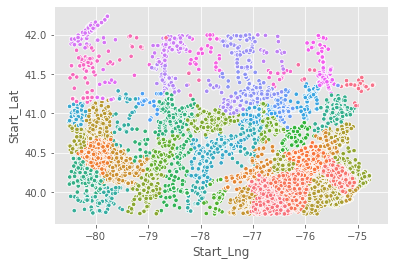

In [37]:
# Map of accidents, color code by county

sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_state, hue='County', legend=False, s=20)
plt.show()

In [38]:
# Set county
county='Montgomery'

# Select the state of Pennsylvania
df_county=df_state.loc[df_state.County==county].copy()
df_county.drop('County',axis=1, inplace=True)
df_county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29913 entries, 4 to 86326
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Source              29913 non-null  object 
 1   TMC                 29913 non-null  float64
 2   Severity            29913 non-null  float64
 3   Start_Lng           29913 non-null  float64
 4   Start_Lat           29913 non-null  float64
 5   Distance(mi)        29913 non-null  float64
 6   Side                29913 non-null  object 
 7   City                29913 non-null  object 
 8   Timezone            29913 non-null  object 
 9   Temperature(F)      29913 non-null  float64
 10  Humidity(%)         29913 non-null  float64
 11  Pressure(in)        29913 non-null  float64
 12  Visibility(mi)      29913 non-null  float64
 13  Wind_Direction      29913 non-null  object 
 14  Weather_Condition   29913 non-null  object 
 15  Amenity             29913 non-null  float64
 16  Bump

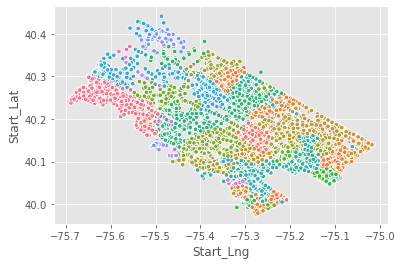

In [39]:
# Map of accidents, color code by city

sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_county, hue='City', legend=False, s=20)
plt.show()

#### Deal with categorical data: pd.get_dummies()


In [40]:
# Generate dummies for categorical data
df_county_dummy = pd.get_dummies(df_county,drop_first=True)

# Export data
# df_county_dummy.to_csv('./US_Accidents_May19_{}_dummy.csv'.format(state),index=False)

df_county_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29913 entries, 4 to 86326
Columns: 164 entries, TMC to Weekday_Wed
dtypes: float64(24), uint8(140)
memory usage: 9.7 MB


### Severity Prediction with various supervised machine learning algorithms

#### Data preparation: train_test_split

In [41]:
# Assign the data
df=df_county_dummy

# Set the target for the prediction
target='Severity'


# Create arrays for the features and the response variable

# set X and y
y = df[target]
X = df.drop(target, axis=1)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [42]:
# List of classification algorithms
algo_lst=['Logistic Regression',' K-Nearest Neighbors','Decision Trees','Random Forest']

# Initialize an empty list for the accuracy for each algorithm
accuracy_lst=[]

#### Algorithm A. Logistic regression              

In [43]:
# Logistic regression
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc))

[Logistic regression algorithm] accuracy_score: 0.944.


c:\users\kohli\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Algorithm B. The K-Nearest Neighbors (KNN) algorithm
##### KNN with 6 neighors

In [44]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X_train,y_train)

# Predict the labels for the training data X
y_pred = knn.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print('[K-Nearest Neighbors (KNN)] knn.score: {:.3f}.'.format(knn.score(X_test, y_test)))
print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.3f}.'.format(acc))

[K-Nearest Neighbors (KNN)] knn.score: 0.929.
[K-Nearest Neighbors (KNN)] accuracy_score: 0.929.


#### Algorithm B. The K-Nearest Neighbors (KNN) algorithm
##### Optmize the number of neighors: plot the accuracy versus number of neighbors

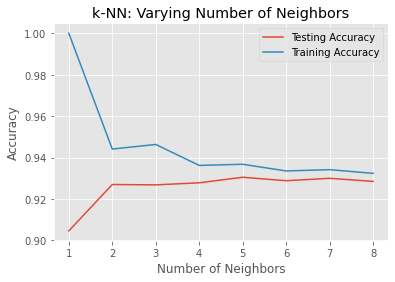

In [45]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, n_neighbor in enumerate(neighbors):
    
    # Setup a k-NN Classifier with n_neighbor
    knn = KNeighborsClassifier(n_neighbors=n_neighbor)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


#### Algorithm C. Decision Tree                 

In [46]:
# Decision tree algorithm

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)


# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)


# Print accuracy_entropy
print('[Decision Tree -- entropy] accuracy_score: {:.3f}.'.format(accuracy_entropy))



# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)


# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred)

# Append to the accuracy list
acc=accuracy_gini
accuracy_lst.append(acc)

# Print accuracy_gini
print('[Decision Tree -- gini] accuracy_score: {:.3f}.'.format(accuracy_gini))

[Decision Tree -- entropy] accuracy_score: 0.963.
[Decision Tree -- gini] accuracy_score: 0.967.


#### Algorithm D. Random Forest   
##### n_estimators=100                 

In [47]:
# Random Forest algorithm

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)


# Model Accuracy, how often is the classifier correct?
print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))


[Randon forest algorithm] accuracy_score: 0.971.


#### Algorithm D. Random Forest   
##### Visualize important features      

No handles with labels found to put in legend.


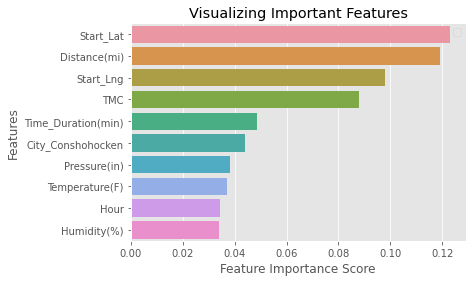

In [48]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [49]:
# List top k important features
k=20
feature_imp.sort_values(ascending=False)[:k]

Start_Lat                0.122780
Distance(mi)             0.119262
Start_Lng                0.097993
TMC                      0.088038
Time_Duration(min)       0.048500
City_Conshohocken        0.043890
Pressure(in)             0.038353
Temperature(F)           0.037239
Hour                     0.034276
Humidity(%)              0.033896
Traffic_Signal           0.024264
Side_R                   0.022353
City_King of Prussia     0.016972
City_Bala Cynwyd         0.015727
Junction                 0.012935
Visibility(mi)           0.012927
City_Plymouth Meeting    0.011940
Weekday_Sun              0.011275
Weekday_Sat              0.009654
Crossing                 0.008482
dtype: float64

#### Algorithm D. Random Forest   
   ##### Select the top important features, set the threshold      

In [50]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.03
sfm = SelectFromModel(clf, threshold=0.03)

# Train the selector
sfm.fit(X_train, y_train)

feat_labels=X.columns

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

TMC
Start_Lng
Start_Lat
Distance(mi)
Temperature(F)
Humidity(%)
Pressure(in)
Hour
Time_Duration(min)
City_Conshohocken


In [51]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [52]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature Model
print('[Randon forest algorithm -- Full feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_pred)))

# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature Model
print('[Randon forest algorithm -- Limited feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_important_pred)))

[Randon forest algorithm -- Full feature] accuracy_score: 0.971.
[Randon forest algorithm -- Limited feature] accuracy_score: 0.969.


#### Plot the accuracy score versus algorithm

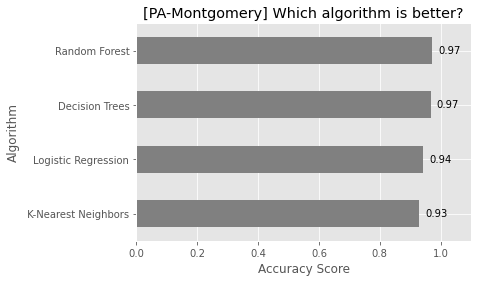

In [53]:
# Make a plot of the accuracy scores for different algorithms

# Generate a list of ticks for y-axis
y_ticks=np.arange(len(algo_lst))

# Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_acc=pd.DataFrame(list(zip(algo_lst, accuracy_lst)), columns=['Algorithm','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending = True)

# Export to a file
df_acc.to_csv('./Accuracy_scores_algorithms_{}.csv'.format(state),index=False)

# Make a plot
ax=df_acc.plot.barh('Algorithm', 'Accuracy_Score', align='center',legend=False,color='0.5')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Set the limit, lables, ticks and title
plt.xlim(0,1.1)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
plt.title('[{}-{}] Which algorithm is better?'.format(state, county))

plt.show()